# Validation du nombre de clusters avec le score de silhouette

Nous appliquons l'algorithme de **k-means** sur un jeu de données multivarié (ici, des mesures physiques de manchots) pour regrouper les observations en clusters non supervisés.

Mais comment choisir le **nombre optimal de clusters $k$** ?

Une méthode courante consiste à utiliser le **score de silhouette**, une *métrique interne* qui évalue la qualité d’un regroupement en comparant la **cohésion** des points dans leur cluster avec leur **séparation** vis-à-vis des autres clusters.

---

#### Définition du score de silhouette

Pour chaque observation $i$, on définit :

- $a(i)$ : la distance moyenne entre $i$ et les autres points de son propre cluster.
- $b(i)$ : la plus petite distance moyenne entre $i$ et les points d’un autre cluster (le plus proche).

Le coefficient de silhouette est donné par :

$$
s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}} \quad \in [-1, 1]
$$

- $s(i) \approx 1$ → point bien assigné à son cluster.
- $s(i) \approx 0$ → point en bordure de deux clusters.
- $s(i) < 0$ → point probablement mal assigné.

---

#### Procédure

Nous testons plusieurs valeurs de $k$ (nombre de clusters) et calculons le **score de silhouette moyen** pour chacune.

Le **$k$ qui maximise ce score** est généralement un bon choix pour représenter une structure de regroupement pertinente.

---

#### Interprétation

Le graphique obtenu permet de :

- visualiser la tendance du score de silhouette selon $k$,
- identifier un **compromis optimal** entre sous-regroupement (k trop petit) et sur-fragmentation (k trop grand).


## Tâches à effectuer 
- standardiser les données (et expliquer pourquoi)
- sur les données standardisées, apppliquer un algorithme de k-means pour $k \in [2 ,9 ]$
- calculer le score de silhouette pour chaque valeur de $k$
- tracer le figure du score de silhouette en fonction de $k$

### Bonus
- le score de silhouette optimal est-il cohérent ? (on pourra chercher des informations sur le dataset ``pinguin`` 

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0        1.370882       3.677566          -9.908657     9.822363
1        1.775123       3.479467         -10.589930     9.117097
2        3.071853       3.626216          -8.270916     9.595797
3       -6.619905      -7.784426          -8.199735     5.662003
4       -7.642886      -8.684992         -10.465870     7.371608
k = 2 → Silhouette = 0.613
k = 3 → Silhouette = 0.813
k = 4 → Silhouette = 0.629
k = 5 → Silhouette = 0.447
k = 6 → Silhouette = 0.265
k = 7 → Silhouette = 0.255
k = 8 → Silhouette = 0.258
k = 9 → Silhouette = 0.260


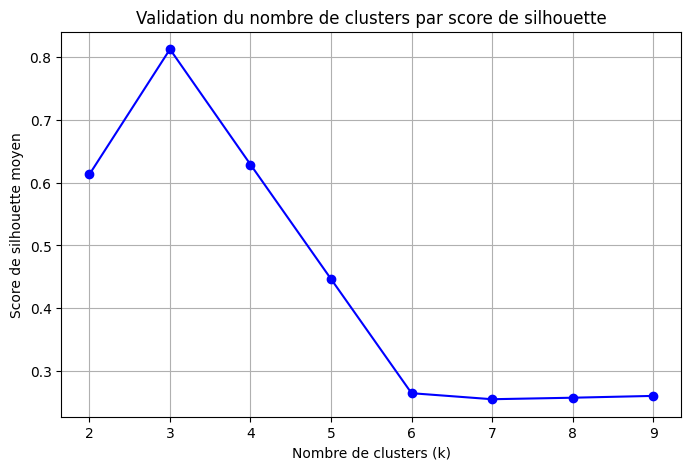

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Charger les données depuis le fichier CSV
df = pd.read_csv("penguins_numeric.csv") 

# Vérification
print(df.head())

# Standardisation
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.dropna())

# Calcul des scores silhouette pour différents k
range_k = range(2, 10)
scores = []

for k in range_k:
    # a completer 
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, cluster_labels)
    scores.append(score)
    print(f"k = {k} → Silhouette = {score:.3f}")

# Affichage des résultats
plt.figure(figsize=(8, 5))
plt.plot(range_k, scores, 'bo-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Score de silhouette moyen')
plt.title('Validation du nombre de clusters par score de silhouette')
plt.grid(True)
plt.show()

